# EDA

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [ ]:
data=pd.read_csv("Groceries_dataset.csv")

In [ ]:
data.shape

(38765, 3)

**The dataset has 38765 rows of the purchase orders of people from the grocery stores. These orders can be analysed and association rules can be generated using Market Basket Analysis by algorithms like Apriori Algorithm.**

In [ ]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
data.sort_values(by=['Date'])

,Member_number,Date,itemDescription
13581,4942,01-01-2014,butter
9557,1922,01-01-2014,tropical fruit
30568,3797,01-01-2014,whole milk
13449,2237,01-01-2014,bottled water
9172,2226,01-01-2014,sausage
...,...,...,...
3049,3122,31-10-2015,chicken
785,1981,31-10-2015,chicken
16087,1787,31-10-2015,chocolate
19198,3122,31-10-2015,bottled beer


In [ ]:
#data_eda = data.copy()
data_eda = pd.read_csv("Groceries_dataset.csv",index_col='Date', parse_dates=True)
data_eda.head()

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk


In [ ]:
#Number of unique Costumers and Items
print(data_eda.Member_number.nunique())
print(data_eda.itemDescription.nunique())

3898
167


In [ ]:
#Creating new columns based on the date column
data_eda['year'] = data_eda.index.year
data_eda['month'] = data_eda.index.month
data_eda['day'] = data_eda.index.day
data_eda['weekday'] = data_eda.index.strftime('%A')
data_eda['monthName'] = data_eda.index.strftime('%B')
data_eda.head()

,Member_number,itemDescription,year,month,day,weekday,monthName
Date,,,,,,,
2015-07-21,1808,tropical fruit,2015,7,21,Tuesday,July
2015-05-01,2552,whole milk,2015,5,1,Friday,May
2015-09-19,2300,pip fruit,2015,9,19,Saturday,September
2015-12-12,1187,other vegetables,2015,12,12,Saturday,December
2015-01-02,3037,whole milk,2015,1,2,Friday,January


In [ ]:
data_eda['year'].value_counts()

2015    20488
2014    18277
Name: year, dtype: int64

Text(0.5, 1.0, 'Sales in months')

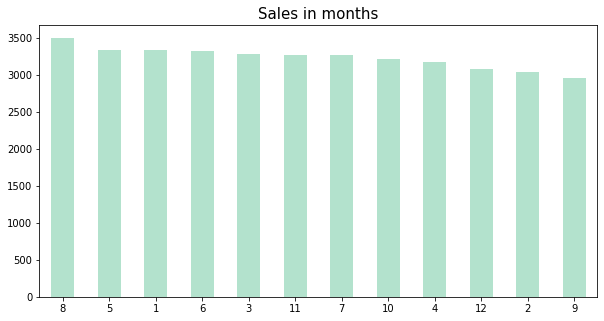

In [ ]:
plt.figure(figsize=(10, 5))
data_eda['month'].value_counts(sort=True).plot(kind='bar',rot=0,colormap='Pastel2')
plt.title('Sales in months', size=15)

Text(0.5, 1.0, 'Sales in Weekdays')

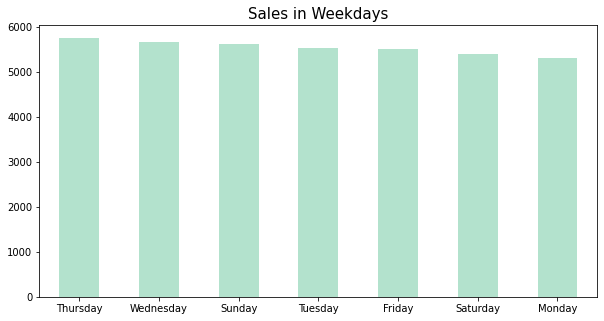

In [ ]:
plt.figure(figsize=(10, 5))
data_eda['weekday'].value_counts(sort=True).plot(kind='bar',rot=0,colormap='Pastel2')
plt.title('Sales in Weekdays', size=15)

Text(0.5, 1.0, 'Sales in Days')

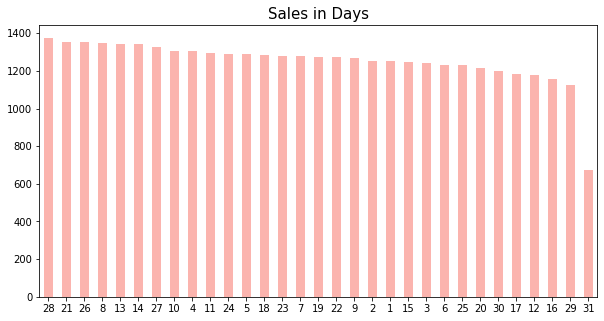

In [ ]:
plt.figure(figsize=(10, 5))
data_eda['day'].value_counts(sort=True).plot(kind='bar',rot=0,colormap='Pastel1')
plt.title('Sales in Days', size=15)

To find top 50 itmes sold 

In [ ]:
df1 = pd.DataFrame(data_eda['itemDescription'].value_counts().head(50)).reset_index()
df1.columns =['itemDescription','Count']
df1.head()

,itemDescription,Count
0,whole milk,2502
1,other vegetables,1898
2,rolls/buns,1716
3,soda,1514
4,yogurt,1334


Text(0, 0.5, 'Quantity')

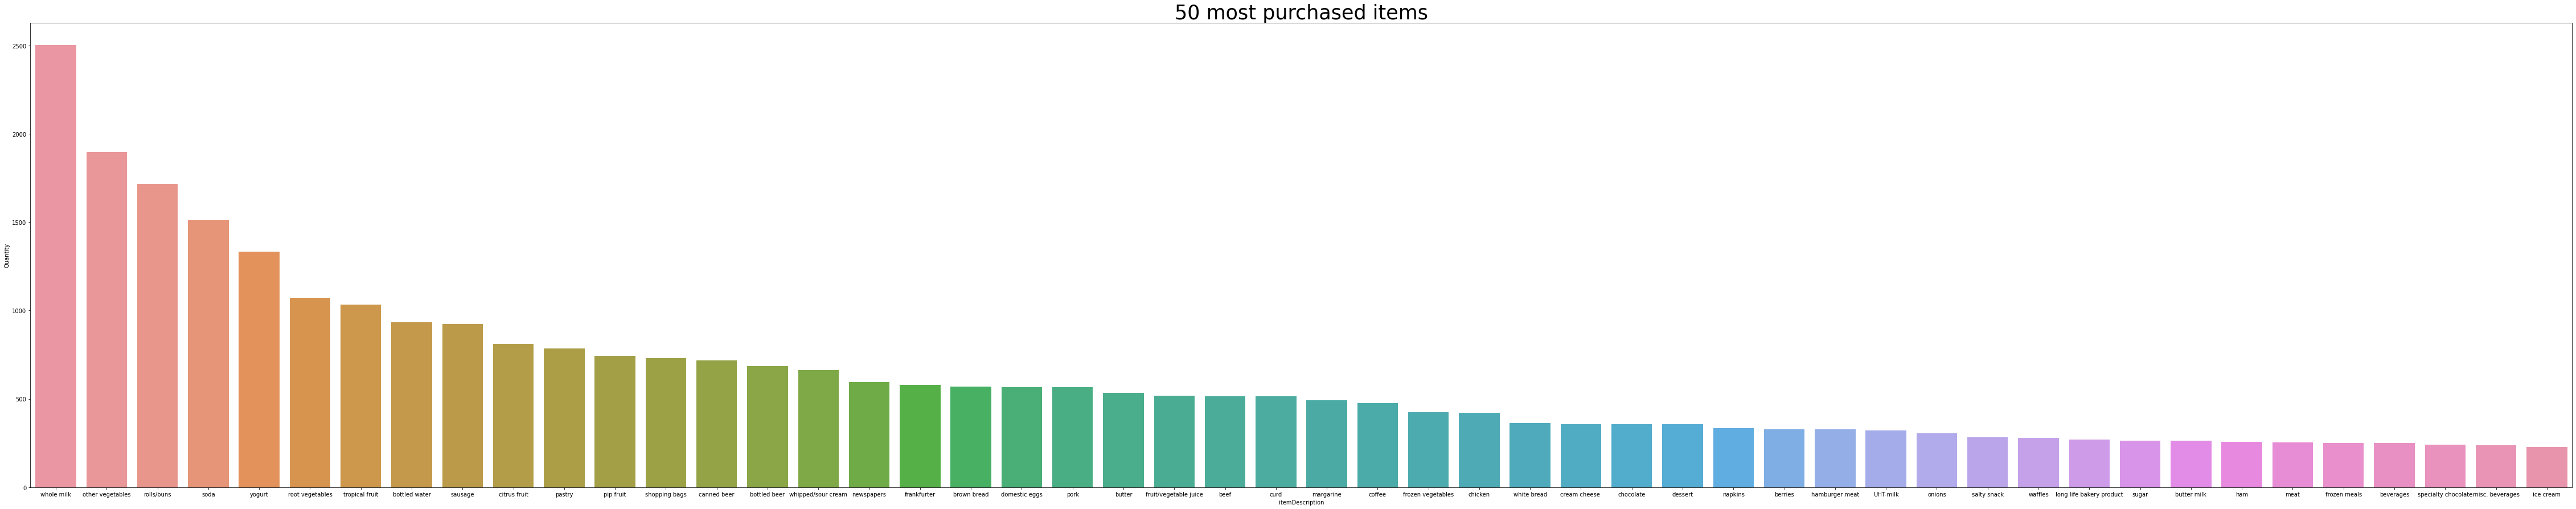

In [ ]:
plt.figure(figsize=(80, 15))
sns.barplot(x='itemDescription',y='Count', data=df1)
plt.title('50 most purchased items', size=35)
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

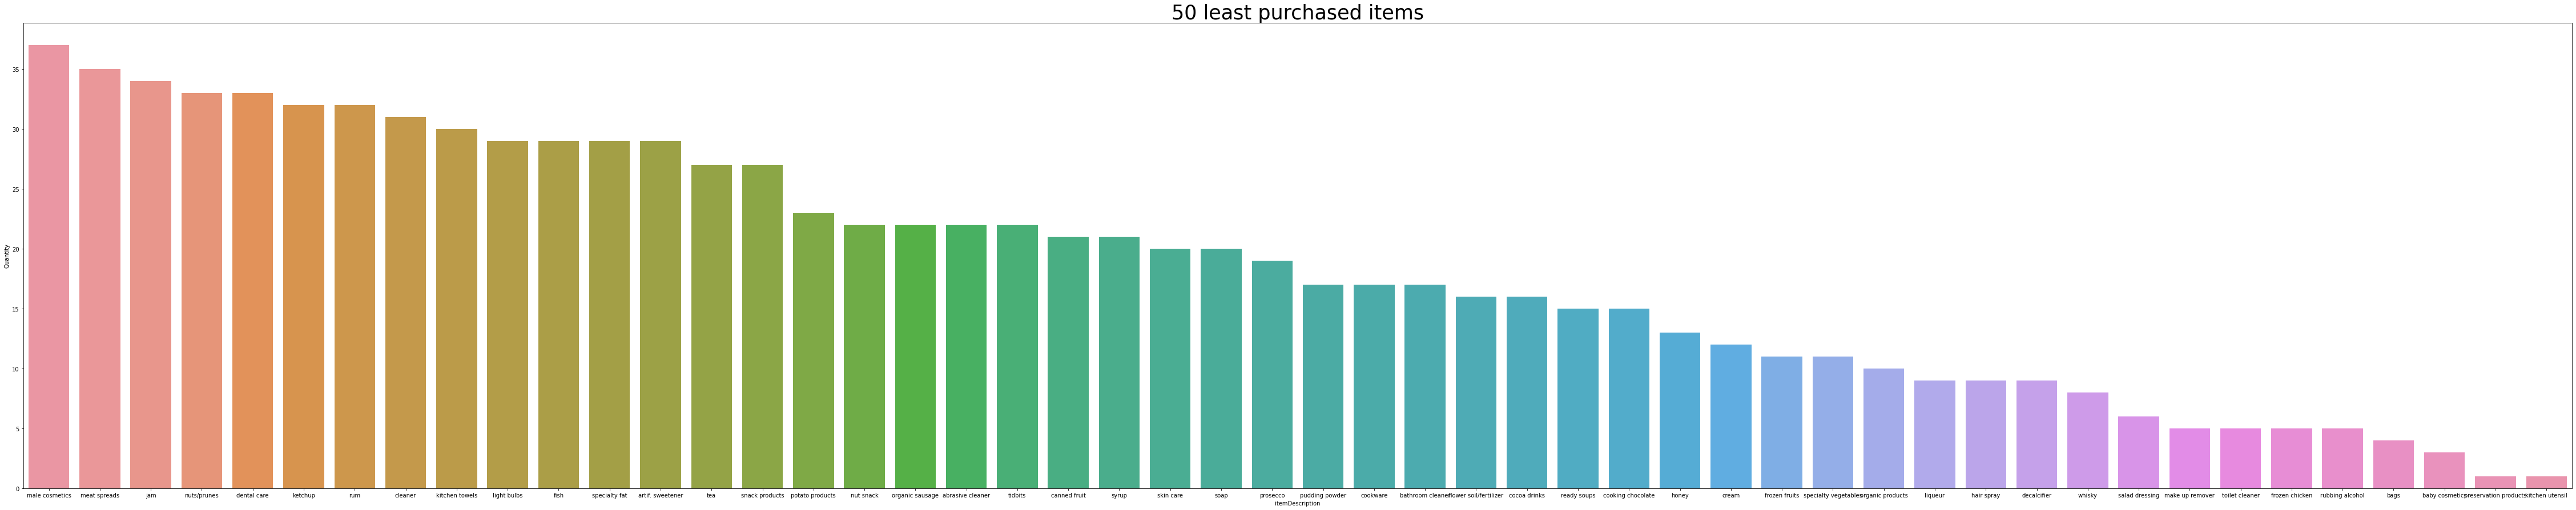

In [ ]:
df2 = pd.DataFrame(data_eda['itemDescription'].value_counts().tail(50)).reset_index()
df2.columns =['itemDescription','Count']
plt.figure(figsize=(80, 15))
sns.barplot(x='itemDescription',y='Count', data=df2)
plt.title('50 least purchased items', size=35)
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

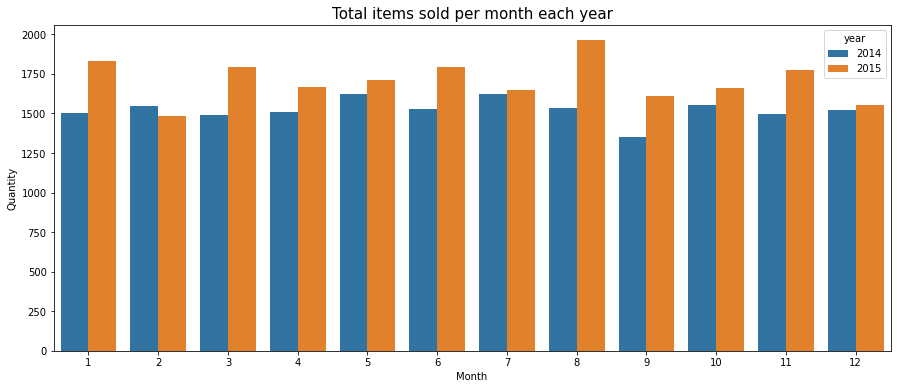

In [ ]:
#Total items sold per month each year
plt.figure(figsize=(15,6))
ax = sns.countplot(x='month', hue='year', data=data_eda)
plt.title('Total items sold per month each year', size=15)
plt.xlabel('Month')
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

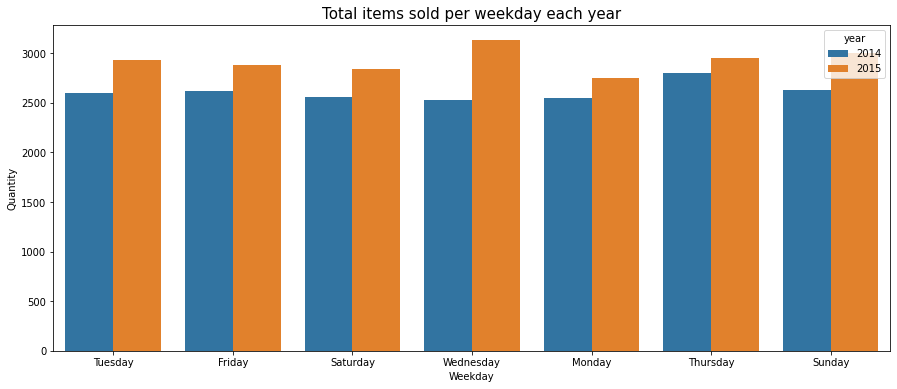

In [ ]:
#Total items sold per weekday each year  
plt.figure(figsize=(15,6))
ax = sns.countplot(x='weekday', hue='year', data=data_eda)
plt.title('Total items sold per weekday each year', size=15)
plt.xlabel('Weekday')
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

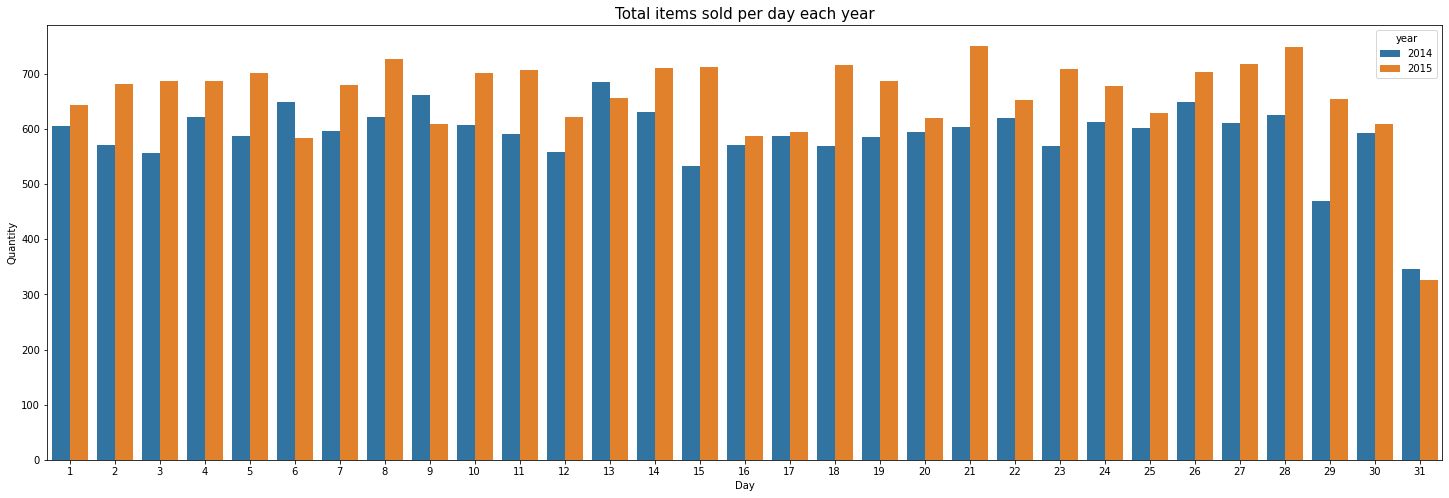

In [ ]:
#Total items sold per day each year
plt.figure(figsize=(25,8))
ax = sns.countplot(x='day', hue='year', data=data_eda)
plt.title('Total items sold per day each year', size=15)
plt.xlabel('Day')
plt.ylabel('Quantity')

In [ ]:
total_items = len(data_eda)
total_days = len(np.unique(data_eda.index.date))
total_months = len(np.unique(data_eda.index.month))
average_items = total_items / total_days
unique_items = data_eda.itemDescription.unique().size

print("Total {} items sold in {} days throughout 2 years".format(total_items, total_days))
print("With an average of {} items sold daily".format(average_items))

Total 38765 items sold in 728 days throughout 2 years
With an average of 53.24862637362637 items sold daily


Text(0, 0.5, 'Quantity Purchased')

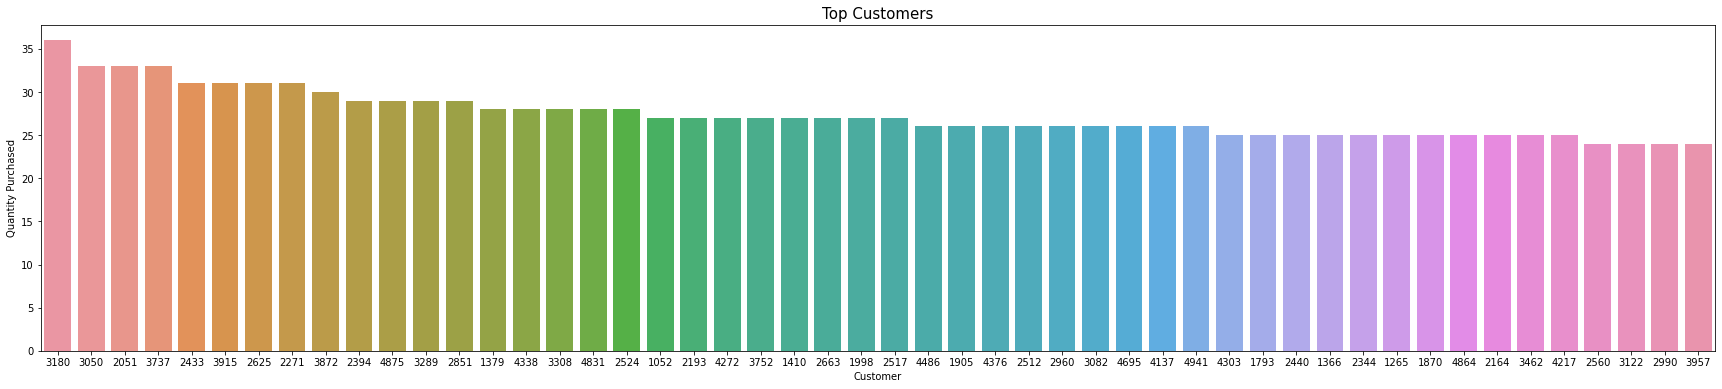

In [ ]:
#Top Customers
plt.figure(figsize=(30,6))
ax = sns.countplot(x='Member_number', data=data_eda, order=data_eda.Member_number.value_counts().iloc[:50].index)
plt.title('Top Customers', size=15)
plt.xlabel('Customer')
plt.ylabel('Quantity Purchased')

# Apriori Model

In [ ]:
user_id = input()

2005


In [ ]:
df3 = data.loc[data['Member_number'] == int(user_id)]

In [ ]:
df3

,Member_number,Date,itemDescription
4827,2005,22-09-2015,bottled beer
5248,2005,20-04-2015,pork
8379,2005,22-09-2015,jam
10202,2005,18-10-2014,mustard
12082,2005,22-11-2014,brown bread
20976,2005,22-09-2015,male cosmetics
21397,2005,20-04-2015,yogurt
24528,2005,22-09-2015,dessert
26351,2005,18-10-2014,yogurt
28231,2005,22-11-2014,rolls/buns


In [ ]:
df3.shape

(13, 3)

In [ ]:
df3.values

array([[2005, '22-09-2015', 'bottled beer'],
       [2005, '20-04-2015', 'pork'],
       [2005, '22-09-2015', 'jam'],
       [2005, '18-10-2014', 'mustard'],
       [2005, '22-11-2014', 'brown bread'],
       [2005, '22-09-2015', 'male cosmetics'],
       [2005, '20-04-2015', 'yogurt'],
       [2005, '22-09-2015', 'dessert'],
       [2005, '18-10-2014', 'yogurt'],
       [2005, '22-11-2014', 'rolls/buns'],
       [2005, '18-10-2014', 'cat food'],
       [2005, '18-10-2014', 'bottled beer'],
       [2005, '20-04-2015', 'soda']], dtype=object)

In [ ]:
transactions = [a[1]['itemDescription'].tolist() for a in list(df3.groupby(['Date']))]

In [ ]:
transactions

[['mustard', 'yogurt', 'cat food', 'bottled beer'],
 ['pork', 'yogurt', 'soda'],
 ['bottled beer', 'jam', 'male cosmetics', 'dessert'],
 ['brown bread', 'rolls/buns']]

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
te = TransactionEncoder()

In [ ]:
te_ary = te.fit(transactions).transform(transactions)

In [ ]:
te.columns_

['bottled beer',
 'brown bread',
 'cat food',
 'dessert',
 'jam',
 'male cosmetics',
 'mustard',
 'pork',
 'rolls/buns',
 'soda',
 'yogurt']

In [ ]:
te_ary

array([[ True, False,  True, False, False, False,  True, False, False,
        False,  True],
       [False, False, False, False, False, False, False,  True, False,
         True,  True],
       [ True, False, False,  True,  True,  True, False, False, False,
        False, False],
       [False,  True, False, False, False, False, False, False,  True,
        False, False]])

In [ ]:
transactions = pd.DataFrame(te_ary, columns=te.columns_)
transactions

,bottled beer,brown bread,cat food,dessert,jam,male cosmetics,mustard,pork,rolls/buns,soda,yogurt
0,True,False,True,False,False,False,True,False,False,False,True
1,False,False,False,False,False,False,False,True,False,True,True
2,True,False,False,True,True,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False,True,False,False


In [ ]:
#Count is the total no of transactions in each colums, and freq is the no of times *TOP variable* appeared in that column 
pf = transactions.describe()
pf

,bottled beer,brown bread,cat food,dessert,jam,male cosmetics,mustard,pork,rolls/buns,soda,yogurt
count,4,4,4,4,4,4,4,4,4,4,4
unique,2,2,2,2,2,2,2,2,2,2,2
top,True,False,False,False,False,False,False,False,False,False,True
freq,2,3,3,3,3,3,3,3,3,3,2


In [ ]:
#Count - Freq from above table - to find no of TRUE values
pf.iloc[0]-pf.iloc[3]

bottled beer      2
brown bread       1
cat food          1
dessert           1
jam               1
male cosmetics    1
mustard           1
pork              1
rolls/buns        1
soda              1
yogurt            2
dtype: object

In [ ]:
f = pf.iloc[0]-pf.iloc[3]
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False)

In [ ]:
item

,Count,Item
0,2,bottled beer
10,2,yogurt
1,1,brown bread
2,1,cat food
3,1,dessert
4,1,jam
5,1,male cosmetics
6,1,mustard
7,1,pork
8,1,rolls/buns


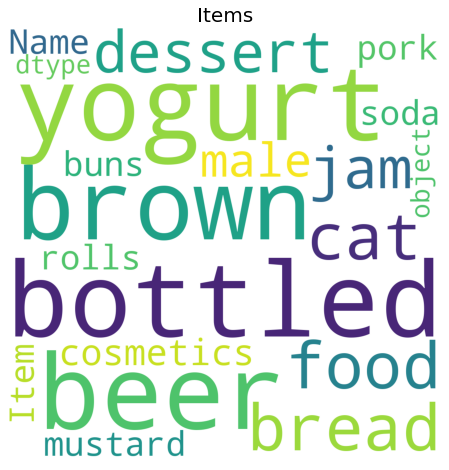

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (8, 8)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(item['Item']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [ ]:
freq_items = apriori(transactions, min_support=0.001, use_colnames=True)
#support = particular itemset/ total no of transactions

In [ ]:
freq_items.shape

(38, 2)

In [ ]:
freq_items.head(10)

,support,itemsets
0,0.50,(bottled beer)
1,0.25,(brown bread)
2,0.25,(cat food)
3,0.25,(dessert)
4,0.25,(jam)
5,0.25,(male cosmetics)
6,0.25,(mustard)
7,0.25,(pork)
8,0.25,(rolls/buns)
9,0.25,(soda)


In [ ]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))

In [ ]:
freq_items['length'].unique()

array([1, 2, 3, 4])

In [ ]:
freq_items.head(100)

,support,itemsets,length
0,0.50,(bottled beer),1
1,0.25,(brown bread),1
2,0.25,(cat food),1
3,0.25,(dessert),1
4,0.25,(jam),1
5,0.25,(male cosmetics),1
6,0.25,(mustard),1
7,0.25,(pork),1
8,0.25,(rolls/buns),1
9,0.25,(soda),1


In [ ]:
freq_items.tail(10)

,support,itemsets,length
28,0.25,"(yogurt, cat food, bottled beer)",3
29,0.25,"(dessert, bottled beer, jam)",3
30,0.25,"(male cosmetics, dessert, bottled beer)",3
31,0.25,"(male cosmetics, jam, bottled beer)",3
32,0.25,"(mustard, yogurt, bottled beer)",3
33,0.25,"(mustard, yogurt, cat food)",3
34,0.25,"(male cosmetics, dessert, jam)",3
35,0.25,"(yogurt, soda, pork)",3
36,0.25,"(mustard, yogurt, cat food, bottled beer)",4
37,0.25,"(male cosmetics, dessert, bottled beer, jam)",4


In [ ]:
length = freq_items.iloc[-1]['length']
length

4

In [ ]:
l = freq_items.loc[freq_items['length'] == length]

In [ ]:
l

,support,itemsets,length
36,0.25,"(mustard, yogurt, cat food, bottled beer)",4
37,0.25,"(male cosmetics, dessert, bottled beer, jam)",4


In [ ]:
names=[]
for i in l.itemsets:
  for j in i:
    if j not in names:
      names.append(j)

In [ ]:
names

['mustard',
 'yogurt',
 'cat food',
 'bottled beer',
 'male cosmetics',
 'dessert',
 'jam']

In [ ]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.001)

In [ ]:
rules.shape

(114, 9)

In [ ]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(cat food),(bottled beer),0.25,0.50,0.25,1.0,2.0,0.125,inf
1,(bottled beer),(cat food),0.50,0.25,0.25,0.5,2.0,0.125,1.5
2,(dessert),(bottled beer),0.25,0.50,0.25,1.0,2.0,0.125,inf
3,(bottled beer),(dessert),0.50,0.25,0.25,0.5,2.0,0.125,1.5
4,(jam),(bottled beer),0.25,0.50,0.25,1.0,2.0,0.125,inf
5,(bottled beer),(jam),0.50,0.25,0.25,0.5,2.0,0.125,1.5
6,(male cosmetics),(bottled beer),0.25,0.50,0.25,1.0,2.0,0.125,inf
7,(bottled beer),(male cosmetics),0.50,0.25,0.25,0.5,2.0,0.125,1.5
8,(mustard),(bottled beer),0.25,0.50,0.25,1.0,2.0,0.125,inf
9,(bottled beer),(mustard),0.50,0.25,0.25,0.5,2.0,0.125,1.5
